<a href="https://colab.research.google.com/github/GabriellFelipe07/Prediction_NearestEarthObjects/blob/main/NASA_Nearest_Earth_Objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NASA - Nearest Earth Objects**

Autor: Gabriel Felipe Machado de Oliveira, 2022

# 1. Introdução
Este projeto é um estudo de Ciência de Dados considerando uma base dados tiradas do NASA Open API e NEO Earth Close Approaches. Através dela, a ideia é aplicar métodos de tratamento de dados e técnicas de Machine Learning para a predição da variável resposta. 

## 1.1. Dataset: NASA - Nearest Earth Objects
O dataset utilizado fornecem valorese características de objetos que orbitam o planeta terra possui. Há 10 colunas, são elas:
1. id: Identificador pra cada asteróide;
2. name: Um nome dado pela NASA ao objeto;
3. est_diameter_min: Valor mínimo estimado do diâmetro do objeto;
4. est_diameter_max: Valor máximo estimado do diâmetro do objeto;
5. relative_velocity: Velocidade relativa da terra no momento de captação do objeto;
6. miss_distance: Distância em Km do objeto;
7. orbiting_body: Corpo na qual o objeto está orbitando;
8. sentry_object: Se houve ou não registro de colisão do asteróide;
9. absolute_magnitude: Descrição da luminosidade do objeto;
10. hazardous: Se o objeto fornece perigo a terra ou não;

A partir disso, o objetivo é realizar a predição da variável hazardous, considerando todas os outros atributos.

# 2. Importação dos Dados

Para importar e visualizar o nosso dataset precisaremos de algumas bibliotecas.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('neo.csv')
data

FileNotFoundError: ignored

Analisando se há dados faltantes e os tipos de dados.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


# 3. Tratamento e Visualização dos Dados

Primeiro, vamos analisar cada um dos atributos quantitativos através de histogramas de frequência.

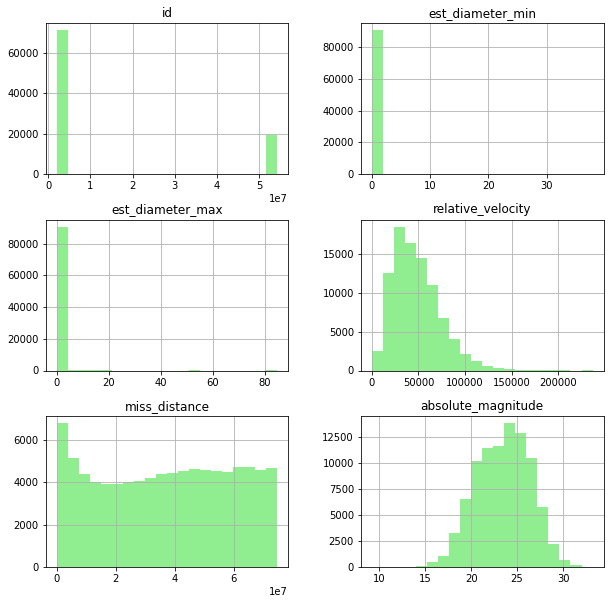

In [ ]:
data.hist(bins = 20, figsize = (10,10), color = 'lightgreen') 
plt.show()

Pensando em nossa predição, faremos algumas alterações no dataset. Perceba que os atributos id e name são irrelevantes para o nosso objetivo final: predição da variável resposta, uma vez que são atributos categóricos e estamos interessados em variáveis numéricas. Assim, excluiremos as duas colunas.

In [ ]:
data = data.drop(columns = ['id', 'name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   orbiting_body       90836 non-null  object 
 5   sentry_object       90836 non-null  bool   
 6   absolute_magnitude  90836 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), object(1)
memory usage: 4.3+ MB


Perceba ainda o comportamento da variável orbiting_body e da variável sentry_object.

In [ ]:
data['orbiting_body'].unique()

array(['Earth'], dtype=object)

In [ ]:
data['sentry_object'].unique()

array([False])

Ambas, além de serem categóricas possuem apenas um valor em todas as linhas. Dessa forma, também excluiremos do nosso dataset.

In [ ]:
data = data.drop(columns = ['orbiting_body', 'sentry_object'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 3.6 MB


In [ ]:
data.shape

(90836, 6)

Agora, possuímos um dataset com 90836 linhas e 6 colunas.

# 4. Análise Exploratória e Estatística Descritiva 

Agora, faremos um análise mais profunda da nossa base. Isto é, focaremos na análise estatística e em suas aplicações para os nossos modelos de predição. Inicialmente, observemos algumas medidas:

In [ ]:
data.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


Com isso, seria interessante verificarmos as correlações entre os atributos.

In [ ]:
data.corr()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
est_diameter_min,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
est_diameter_max,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
relative_velocity,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185
miss_distance,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302
absolute_magnitude,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267
hazardous,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000


Graficamente, as correlações são:

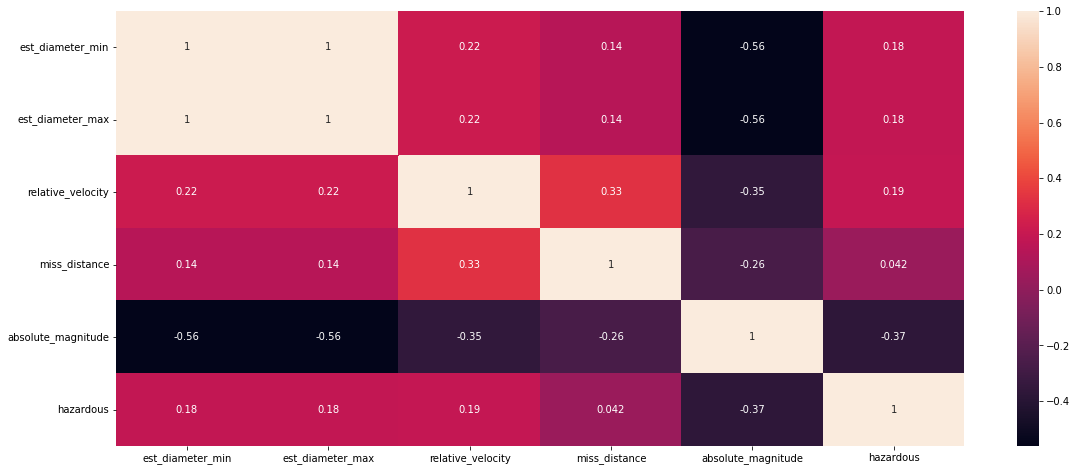

In [ ]:
plt.figure(figsize = (19,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

Observe que temos uma alta correlação entre duas variáveis explicativas: est_diameter_max e est_diameter_min. Para o nosso futuro modelo isso não é interessante, uma vez que certamente atrapalhará o rendimento das nossas predições. Nesse caso, seria melhor excluirmos do dataset um desses dois atributos. 
Aqui, excluiremos o est_diameter_min.

In [ ]:
data = data.drop(columns = ['est_diameter_min'])

In [ ]:
data.shape

(90836, 5)

Agora, temos uma base de dados com 5 atributos e 90836 linhas.

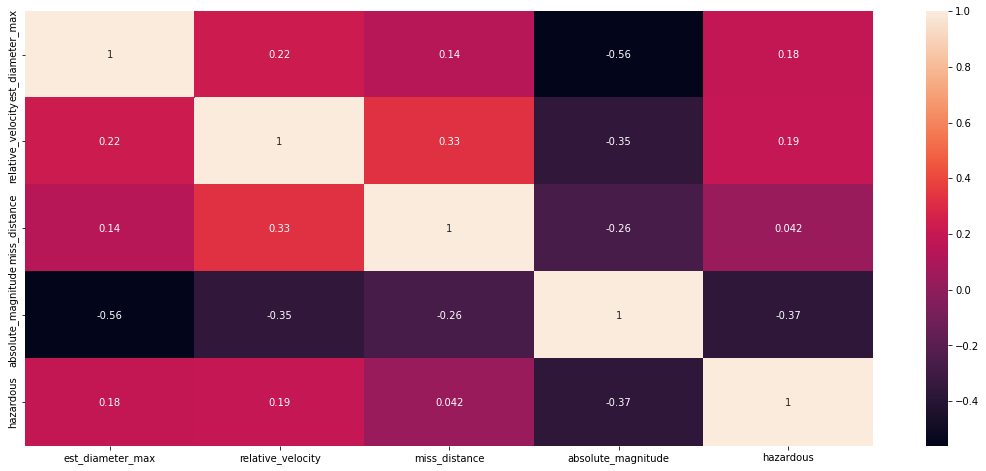

In [ ]:
plt.figure(figsize = (19,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

Analisando novamente os histogramas de frequência e boxplots:

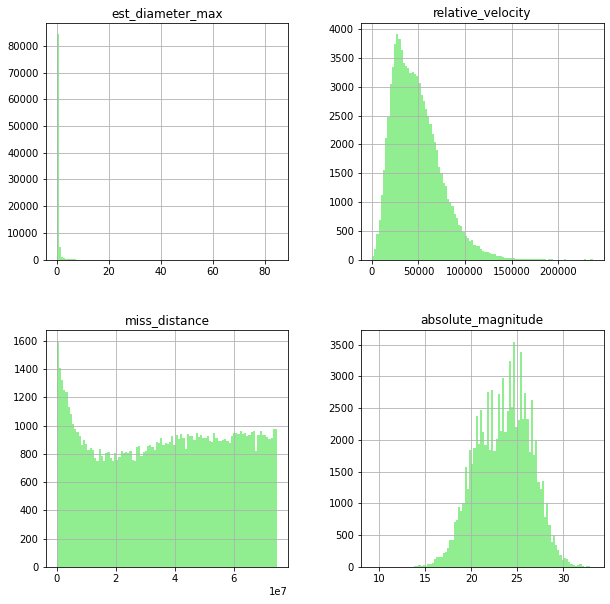

In [ ]:
data.hist(bins = 100, figsize = (10,10), color = 'lightgreen') 
plt.show()

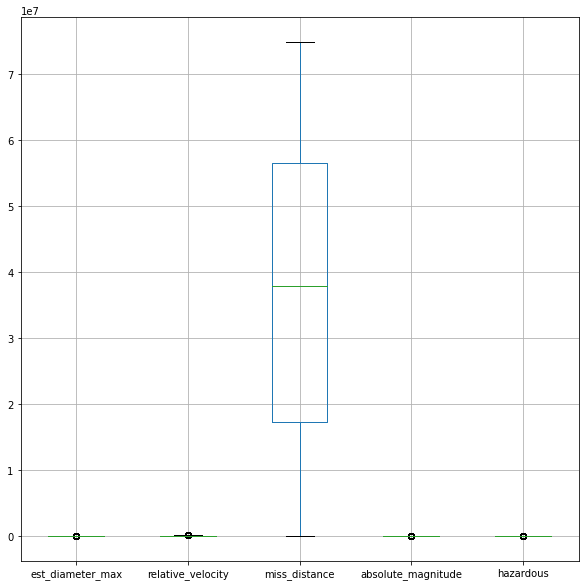

In [ ]:
data.boxplot(figsize = (10,10))
plt.show()

Vamos agora, analisar a variável resposta.

In [ ]:
data['hazardous'].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

Para melhor predizê-lá, converteremos ela pra valores inteiros, True = 1 False = 0.

In [ ]:
data['num_hazardous'] = data['hazardous'].map( {True: 1, False: 0} ).astype(int)
display(data)

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,num_hazardous
0,2.679415,13569.249224,5.483974e+07,16.73,False,0
1,0.594347,73588.726663,6.143813e+07,20.00,True,1
2,1.614507,114258.692129,4.979872e+07,17.83,False,0
3,0.215794,24764.303138,2.543497e+07,22.20,False,0
4,0.570217,42737.733765,4.627557e+07,20.09,True,1
...,...,...,...,...,...,...
90831,0.059435,52078.886692,1.230039e+07,25.00,False,0
90832,0.037501,46114.605073,5.432121e+07,26.00,False,0
90833,0.071456,7566.807732,2.840077e+07,24.60,False,0
90834,0.016370,69199.154484,6.869206e+07,27.80,False,0


E excluíremos a coluna antiga.

In [ ]:
data = data.drop(columns = ['hazardous'])
data['num_hazardous'].value_counts()

0    81996
1     8840
Name: num_hazardous, dtype: int64

Finalmente, temos o seguinte dataset:

In [ ]:
data

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,num_hazardous
0,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.594347,73588.726663,6.143813e+07,20.00,1
2,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.570217,42737.733765,4.627557e+07,20.09,1
...,...,...,...,...,...
90831,0.059435,52078.886692,1.230039e+07,25.00,0
90832,0.037501,46114.605073,5.432121e+07,26.00,0
90833,0.071456,7566.807732,2.840077e+07,24.60,0
90834,0.016370,69199.154484,6.869206e+07,27.80,0


# 5. Modelos de Classificação, Preparação e Predição dos dados

Importaremos alguma bibliotecas necessárias para modelarmos nossos dados e fazermos as predições.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 5.1. Separação dados de treino e teste

Primeiro, separaremos o dataset entre variáveis explicativas e variável reposta. 

In [ ]:
X = data.drop(columns = ['num_hazardous'])
y = data['num_hazardous']

print(X.shape, y.shape)

(90836, 4) (90836,)


Agora, separaremos os dados de treinamento e teste, sendo os dados de teste 20% das linhas totais do nosso dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
accuracyLista = []

## 5.2. Logistic Regression

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

accuracyLR = round(accuracy_score(y_test, y_pred), 4)
accuracyLista.append(accuracyLR)
print('Accuracy: ', accuracyLR)

Accuracy:  0.9012


## 5.3. XGBClassifier

In [ ]:
xgbclassifier = XGBClassifier()
xgbclassifier.fit(X_train, y_train)
y_pred = xgbclassifier.predict(X_test)

accuracyxgb = round(accuracy_score(y_test, y_pred),4)
accuracyLista.append(accuracyxgb)
print('Accuracy:', accuracyxgb)

Accuracy: 0.9123


## 5.4. KNeighborsClassifier 

In [ ]:
kclassifier = KNeighborsClassifier()
kclassifier.fit(X_train, y_train)
y_pred = kclassifier.predict(X_test)

accuracyknn = round(accuracy_score(y_test, y_pred), 4)
accuracyLista.append(accuracyknn)
print('Accuracy:', accuracyknn)

Accuracy: 0.8932


## 5.5. RandomForestClassifier

In [ ]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

accuracyrandom = round(accuracy_score(y_test, y_pred), 4) 
accuracyLista.append(accuracyrandom)
print('Accuracy:', accuracyrandom)

Accuracy: 0.9174


## 5.6. GaussianNB

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

accuracygaussian = round(accuracy_score(y_test, y_pred), 4)
accuracyLista.append(accuracygaussian)
print('Accuracy:', accuracygaussian)

Accuracy: 0.8957


## 5.7. SGDClassifier

In [ ]:
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)
y_pred = sgdc.predict(X_test)

accuracysgdc = round(accuracy_score(y_test, y_pred), 4)
accuracyLista.append(accuracysgdc)
print('Accuracy:', accuracysgdc)

Accuracy: 0.852


## 5.7. DecisionTreeClassifier

In [ ]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
y_pred = dectree.predict(X_test)

accuracydectree = round(accuracy_score(y_test, y_pred), 4)
accuracyLista.append(accuracydectree)
print('Accuracy:', accuracydectree)

Accuracy: 0.8933


## 5.8 Sumarização das Acurácias

Facilitando nossa visualização das acurácias, faremos um DataFrame dos resultados de cada modelo.

In [ ]:
classificadores = ['Logistic Regression', 'XGBClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'SGDClassifier', 'DecisionTreeClassifier']

dic = {'Models': classificadores, 'Accuracy': accuracyLista}
sum = pd.DataFrame(dic)
sum

,Models,Accuracy
0,Logistic Regression,0.9012
1,XGBClassifier,0.9123
2,KNeighborsClassifier,0.8932
3,RandomForestClassifier,0.9174
4,GaussianNB,0.8957
5,SGDClassifier,0.8520
6,DecisionTreeClassifier,0.8933


# 6. Conclusão

Observe abaixo a acurácia de cada modelo na qual treinamos e testamos o nosso dataset

In [ ]:
sum.sort_values(by='Accuracy', ascending=False)

,Models,Accuracy
3,RandomForestClassifier,0.9174
1,XGBClassifier,0.9123
0,Logistic Regression,0.9012
4,GaussianNB,0.8957
6,DecisionTreeClassifier,0.8933
2,KNeighborsClassifier,0.8932
5,SGDClassifier,0.8520


O três melhores modelos não-paramétricos para a predição da variável resposta são: Ramdom Forest, XGBoost e o Logistic Regression. Os três conseguiram acurácias maiores que 90%. 

Assim, concluímos que para a predição e classificação da prejudicialidade de corpos que orbitam a terra a melhor opção seria utilizar a classifiação Random Forest.